In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [2]:
# Files to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [3]:
# Read the city data file and store it into a pandas DataFrame.
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset.
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", 
                       on=["city","city"])

# Display the DataFrame.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Urban city DataFrame.
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]

rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]

In [18]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Create the suburban and rural ride count.
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
# Get the average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get the average fare for each city in the suburban and rural cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Get the average number of drivers for each urban city.
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get the average number of drivers for each suburban and rural city.
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]

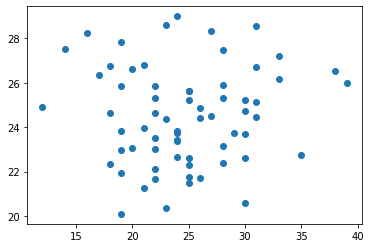

In [24]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,urban_avg_fare)

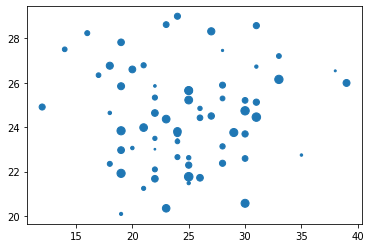

In [25]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=urban_driver_count)


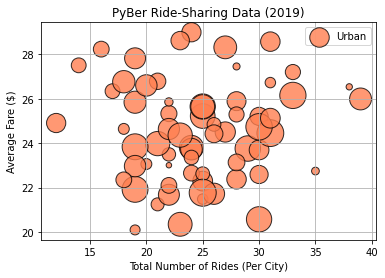

In [26]:
# Build the scatter plots for the urban cities and average fare.
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")

# Add title
plt.title("PyBer Ride-Sharing Data (2019)")

# Add axes titles
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Enable grid
plt.grid(True)

# Add the legend
plt.legend()

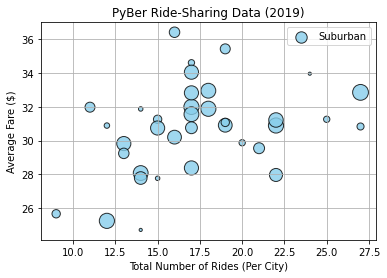

In [27]:
# Build scatter plot for suburban cities and average fare.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")

# Add title
plt.title("PyBer Ride-Sharing Data (2019)")

# Add axes
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

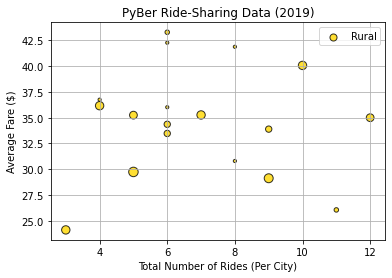

In [28]:
# Build scatter plot for suburban cities and average fare.
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,
           c="gold", edgecolor="black",
           linewidths=1, alpha=0.8, label="Rural")

# Add title
plt.title("PyBer Ride-Sharing Data (2019)")

# Add axes titles
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

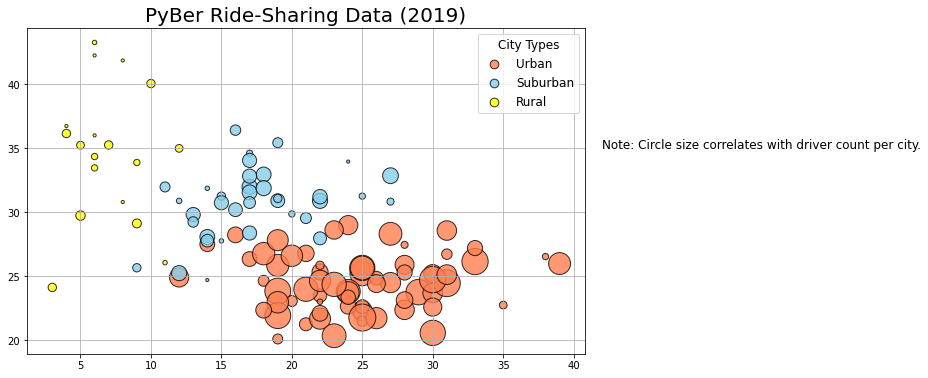

In [29]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="yellow",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")

# Add grid
plt.grid(True)

# Add title
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

# Add axes titles
plt.xlabel=("Total Number of Rides (Per City)")
plt.ylabel=("Average Fare ($)")

# Add legend
lgnd=plt.legend(fontsize="12", mode="Expanded",
               scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize=12)

# Save the figure.
plt.savefig("Resources/Fig1.jpeg")

In [30]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
# Median urban ride count
urban_ride_count.median()

24.0

In [35]:
# Calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [36]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [37]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the ride counts for the urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for the urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [38]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count=np.mean(suburban_ride_count)
print(f"The mean for the ride counts for the urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count=np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for the urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [39]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count=np.mean(rural_ride_count)
print(f"The mean for the ride counts for the urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count=np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for the urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [40]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [41]:
# Get the fares for the suburban cities.
suburban_fares=suburban_cities_df["fare"]

In [42]:
# Get the fares for the rural cities.
rural_fares=rural_cities_df["fare"]

In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
# Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [45]:
# Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares=np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares=sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
# Get the driver count data from the urban cities.
urban_drivers=urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [47]:
# Get the driver count data from the suburban cities.
suburban_drivers=suburban_cities_df["driver_count"]

In [48]:
# Get the driver count data from the rural cities.
rural_drivers=rural_cities_df["driver_count"]

In [49]:
# Calculate the measures of central tendency for the drivers for the urban cities
mean_urban_drivers=np.mean(urban_drivers)

median_urban_drivers=np.median(urban_drivers)

mode_urban_drivers=sts.mode(urban_drivers)

In [50]:
# Calculate the measures of central tendency for the drivers for the suburban cities
mean_suburban_drivers=np.mean(suburban_drivers)

median_suburban_drivers=np.median(suburban_drivers)

mode_suburban_drivers=sts.mode(suburban_drivers)

In [51]:
# Calculate the measures of central tendency for the drivers for the rural cities
mean_rural_drivers=np.mean(rural_drivers)

median_rural_drivers=np.median(rural_drivers)

mode_rural_drivers=sts.mode(rural_drivers)

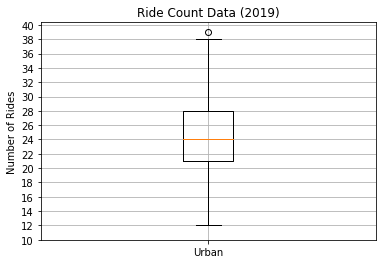

In [52]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]

fig,ax=plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(10,41,step=2.0))

ax.grid()

plt.show()

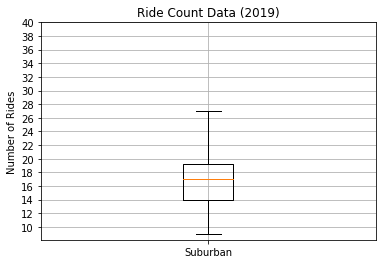

In [53]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels=["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburban_ride_count,labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(10,41,step=2.0))

ax.grid()

plt.show()

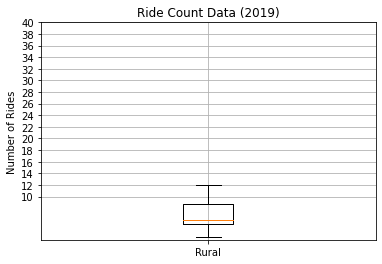

In [54]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels=["Rural"]

fig,ax=plt.subplots()

ax.boxplot(rural_ride_count,labels=x_labels)

# Add the title, y-axis label, and grid.
ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(10,41,step=2.0))

ax.grid()

plt.show()

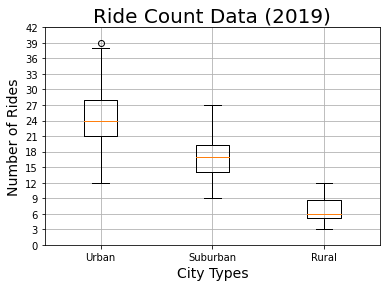

In [56]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]

ride_count_data=[urban_ride_count,suburban_ride_count,rural_ride_count]

fig,ax=plt.subplots()

ax.set_title("Ride Count Data (2019)", fontsize=20)

ax.set_ylabel("Number of Rides", fontsize=14)

ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(ride_count_data,labels=x_labels)

ax.set_yticks(np.arange(0,45,step=3.0))

ax.grid()

# Save the figure
plt.savefig("Resources/Fig2.jpeg")

plt.show()

In [57]:
# Get the city that matches 39.
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


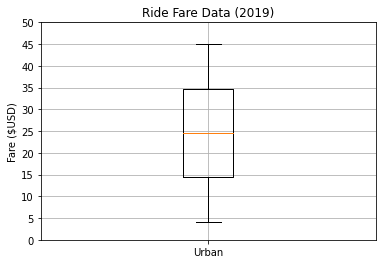

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [58]:
# Create a box-and-whisker plot for the urban fare data.
x_labels=["Urban"]

fig,ax=plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis, and grid
ax.set_title("Ride Fare Data (2019)")

ax.set_ylabel("Fare ($USD)")

ax.set_yticks(np.arange(0,51,step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

urban_fares.describe()

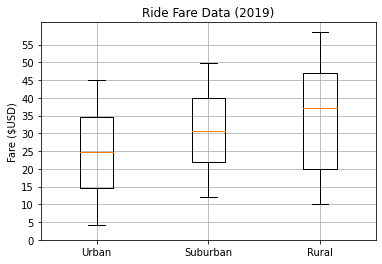

In [65]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]

fare_data=[urban_fares, suburban_fares, rural_fares]

fig,ax=plt.subplots()

ax.boxplot(fare_data,labels=x_labels)

# Add the title, y-axis label, and grid.
ax.set_title("Ride Fare Data (2019)")

ax.set_ylabel("Fare ($USD)")

ax.set_yticks(np.arange(0,60,step=5.0))

ax.grid()

# Save the figure
plt.savefig("Resources/Fig3.jpeg")

plt.show()

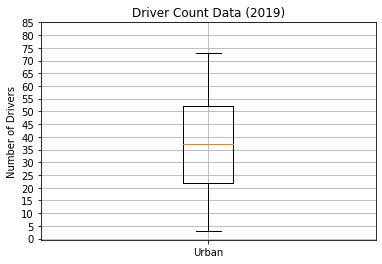

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [63]:
# Create the box-and-whisker plot for the urban driver count data
x_labels=["Urban"]

fig,ax=plt.subplots()

ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label, and grid.
ax.set_title("Driver Count Data (2019)")

ax.set_ylabel("Number of Drivers")

ax.set_yticks(np.arange(0,90,step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

urban_drivers.describe()

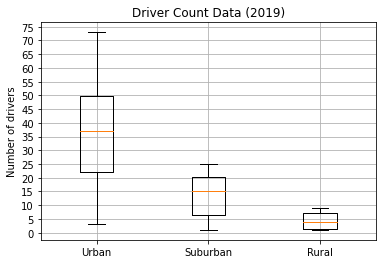

In [71]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]

driver_count=[urban_driver_count, suburban_driver_count, rural_driver_count]

fig,ax=plt.subplots()

ax.boxplot(driver_count, labels=x_labels)

# Add the title, y-axis label, and grid.
ax.set_title("Driver Count Data (2019)")

ax.set_ylabel("Number of drivers")

ax.set_yticks(np.arange(0,80,step=5.0))

ax.grid()

# Save the figure
plt.savefig("Resources/Fig4.jpeg")

plt.show()